In [1]:
from PROJECT_MODULE.BinanceAPI import BinanceClient
from PROJECT_MODULE.TemporalDataUtils import *
import pandas as pd

In [4]:
client = BinanceClient()
data = client.get_recent_klines('BTCBUSD', '15m', output='dataframe')

In [6]:
data.head()

,Open,High,Low,Close,Volume,Close time
open time,,,,,,
1701110700000,37003.37,37058.90,36962.94,36965.53,1.70550,1.701112e+12
1701111600000,36962.39,37018.66,36920.01,36972.75,3.00398,1.701112e+12
1701112500000,36977.69,37029.27,36973.36,37029.22,3.20543,1.701113e+12
1701113400000,37029.25,37056.75,36846.01,36846.01,3.45327,1.701114e+12
1701114300000,36866.61,36892.39,36795.80,36867.76,7.23539,1.701115e+12


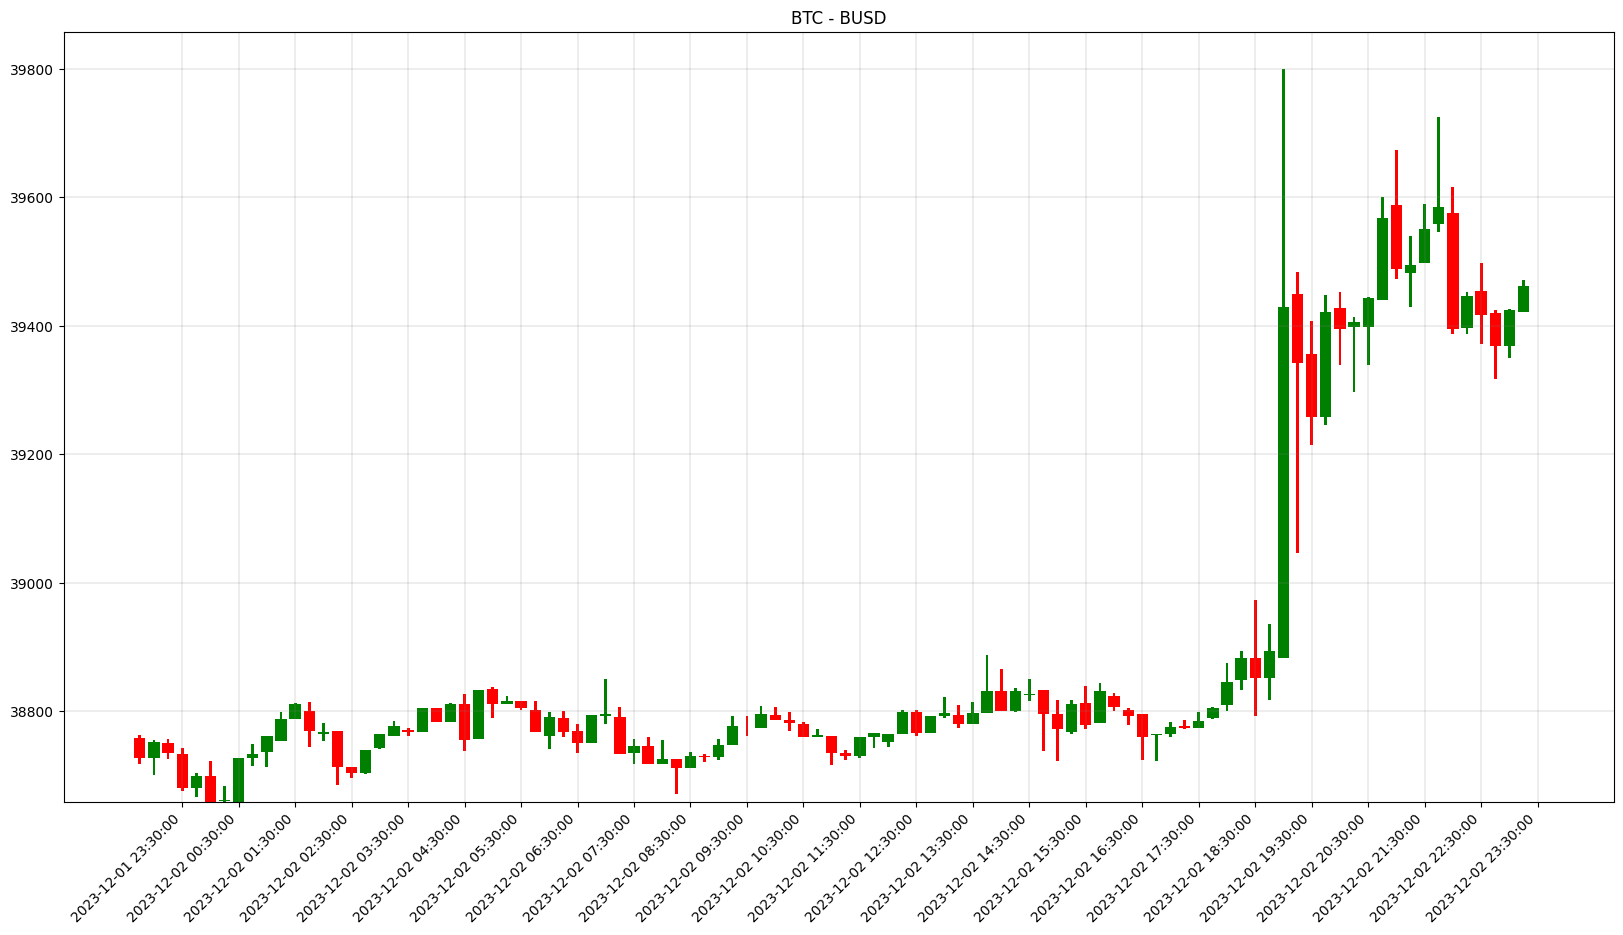

In [5]:
kline_quickchart(data, interval=100)

In [10]:
data.index = ms_to_time(data.index)
data

,Open,High,Low,Close,Volume,Close time
open time,,,,,,
2023-11-27 18:45:00,37003.37,37058.90,36962.94,36965.53,1.70550,1.701112e+12
2023-11-27 19:00:00,36962.39,37018.66,36920.01,36972.75,3.00398,1.701112e+12
2023-11-27 19:15:00,36977.69,37029.27,36973.36,37029.22,3.20543,1.701113e+12
2023-11-27 19:30:00,37029.25,37056.75,36846.01,36846.01,3.45327,1.701114e+12
2023-11-27 19:45:00,36866.61,36892.39,36795.80,36867.76,7.23539,1.701115e+12
...,...,...,...,...,...,...
2023-12-02 22:30:00,39454.52,39497.59,39371.62,39416.29,3.92364,1.701557e+12
2023-12-02 22:45:00,39419.49,39424.14,39317.48,39368.35,1.16638,1.701558e+12
2023-12-02 23:00:00,39368.36,39426.30,39349.52,39425.06,3.05182,1.701559e+12


#### Remove some data

In [34]:
data_with_missing = data.copy()
data_with_missing = data_with_missing.drop(index=pd.date_range('2023-11-28 16:45:00', '2023-11-29 19:45:00', freq='15min'))
data_with_missing = data_with_missing.drop(index=pd.date_range('2023-11-30 06:45:00', '2023-12-01 01:45:00', freq='15min'))

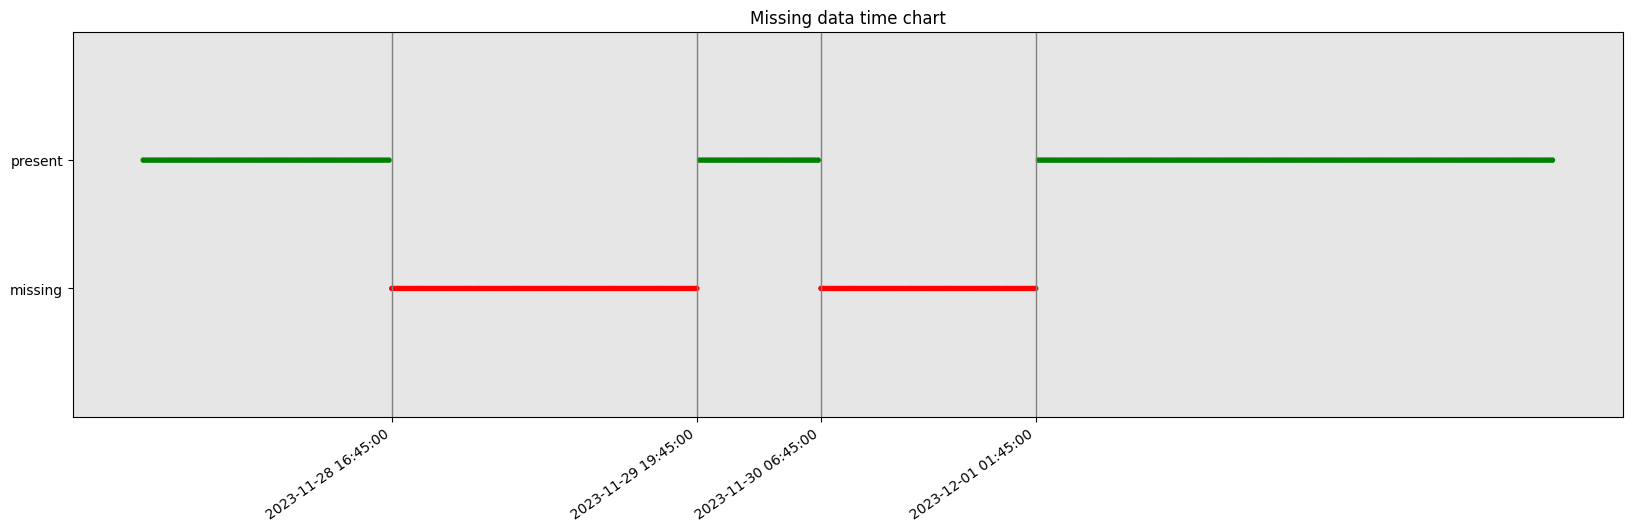

In [36]:
missing_time_ranges = check_completeness(data=data_with_missing, freq='15min', show_plot=True)

In [37]:
missing_time_ranges

[(Timestamp('2023-11-28 16:45:00'), Timestamp('2023-11-29 19:45:00')),
 (Timestamp('2023-11-30 06:45:00'), Timestamp('2023-12-01 01:45:00'))]